In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
path=r"C:\Users\ranad\Desktop\Sche\Machine learning\Deep learning\MNIST"

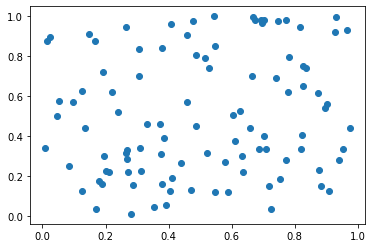

In [2]:
x=np.random.rand(100)
y=np.random.rand(100)
plt.scatter(x[:],y[:])

In [16]:
from sklearn.model_selection import train_test_split
mnist=pd.read_csv(path+"\mnist_train.csv")
mnist_train,mnist_cv=train_test_split(mnist,test_size=0.7,random_state=42)
mnist_norm=mnist_train.iloc[:,1:]/255.0

In [4]:
def display_mnist(data,num):
    datapoint=data.iloc[num,1:].to_numpy().reshape(28,28)
    print("label of the datapoint is:"+str(data.iloc[num,0]))
    plt.imshow(datapoint)

In [17]:
def initialize_random(neural_layers):
    for_dict=dict()
    for i in range(1,len(neural_layers)):
        for_dict["W"+str(i)]=np.random.randn(neural_layers[i],neural_layers[i-1])*0.01
        for_dict["b"+str(i)]=np.zeros((neural_layers[i],1))
    return for_dict

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
6566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def sigmoid(X):
    return np.divide(1,1+np.exp(-X))

In [19]:
def relu(X):
    return np.maximum(0,X)   

In [20]:
def der_sigmoid(X):
    s=sigmoid(X)
    Z=s*(1-s)
    return Z    

In [21]:
def der_relu(X):
    X[X<=0]=0
    return X

In [22]:
def forward_propagation(X,y,neural_layers,for_dict):
    for i in range(1,len(neural_layers)):
        if(i==1):
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],X)+for_dict["b"+str(i)]
        else:
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],for_dict["A"+str(i-1)])+for_dict["b"+str(i)]
        abc=for_dict["Non_linear"+str(i)]
        if(abc=="sigmoid"):
            for_dict["A"+str(i)]=sigmoid(for_dict["Z"+str(i)])
        elif(abc=="relu"):
            for_dict["A"+str(i)]=relu(for_dict["Z"+str(i)])
        elif(abc=="tanh"):
            for_dict["A"+str(i)]=np.tanh(for_dict["Z"+str(i)])
    cost1=(-1)*(np.multiply(y,np.log(for_dict["A"+str(len(neural_layers)-1)]))+np.multiply((1-y),np.log(1-for_dict["A"+str(len(neural_layers)-1)])))
    cost=(1/m)*cost1.sum()
    return for_dict,cost   

In [23]:
def back_propagation(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    back_dict["dZ"+str(n)]=for_dict["A"+str(n)]-y
    back_dict["dW"+str(n)]=(1/m)*np.dot(back_dict["dZ"+str(n)],for_dict["A"+str(n-1)].T)
    back_dict["db"+str(n)]=(1/m)*np.sum(back_dict["dZ"+str(n)],axis=1,keepdims=True)
    back_dict["dZ"+str(n-1)]=np.multiply(np.dot(for_dict["W"+str(n)].T,back_dict["dZ"+str(n)]),der_sigmoid(for_dict["Z"+str(n-1)]))
    back_dict["dW"+str(n-1)]=(1/m)*np.dot(back_dict["dZ"+str(n-1)],for_dict["A"+str(n-2)].T)
    back_dict["db"+str(n-1)]=(1/m)*np.sum(back_dict["dZ"+str(n-1)],axis=1,keepdims=True)
    for i in range(n-2,1,-1):      
        back_dict["dZ"+str(i)]=np.multiply(np.dot(for_dict["W"+str(i+1)].T,back_dict["dZ"+str(i+1)]),der_relu(for_dict["Z"+str(i)]))  
        back_dict["dW"+str(i)]=(1/m)*np.dot(back_dict["dZ"+str(i)],for_dict["A"+str(i-1)].T)
        back_dict["db"+str(i)]=(1/m)*np.sum(back_dict["dZ"+str(i)],axis=1,keepdims=True)
    back_dict["dZ"+str(1)]=np.multiply(np.dot(for_dict["W"+str(2)].T,back_dict["dZ"+str(2)]),der_relu(for_dict["Z"+str(1)])) 
    back_dict["dW"+str(1)]=np.dot(back_dict["dZ"+str(1)],X.T)/m
    back_dict["db"+str(1)]=(1/m)*np.sum(back_dict["dZ"+str(1)],axis=1,keepdims=True)
    return back_dict,for_dict

In [24]:
def model(X,y,neural_layers,alpha,iterations):
    for_dict=initialize_random(neural_layers)
    #check for_dict weights dimensions
   # for i in range(1,len(neural_layers)):
    #    assert(for_dict["W"+str(i)].shape==(neural_layers[i],neural_layers[i-1]))
     #   assert(for_dict["b"+str(i)].shape==(neural_layers[i],1)
               
    for i in range(1,len(neural_layers)):
        if(i==(len(neural_layers)-1)):
            for_dict["Non_linear"+str(i)]="sigmoid"
        else:
            for_dict["Non_linear"+str(i)]="relu"
    rec_cost=[]
    back_dict=dict()
    for i in range(iterations):
        for_dict,cost=forward_propagation(X,y,neural_layers,for_dict)
        #rec_cost.append(cost)
        if(i%100==0):
            rec_cost.append(cost)
        back_dict,for_dict=back_propagation(X,y,neural_layers,for_dict,back_dict)
        for i in range(1,len(neural_layers)):
            for_dict["W"+str(i)]=for_dict["W"+str(i)]-alpha*back_dict["dW"+str(i)]
            for_dict["b"+str(i)]=for_dict["b"+str(i)]-alpha*back_dict["db"+str(i)]
    return for_dict,rec_cost

## Recurrent Neural Networks